# Basic Example

After https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras_Cheat_Sheet_Python.pdf

In [1]:
import numpy as np

In [2]:
data = np.random.random((1000, 100))

In [3]:
labels = np.random.randint(2, size=(1000, 1))

In [4]:
from conx import Network, Layer, Dataset, one_hot

Using Theano backend.


In [5]:
net = Network("Example")

In [6]:
net.add(Layer("input", shape=100, vshape=(10,10)))
net.add(Layer("hidden", shape=32, vshape=(4, 8), activation="relu"))
net.add(Layer("output", shape=10, activation="sigmoid"))

net.connect("input", "hidden")
net.connect("hidden", "output")

In [7]:
net.compile(optimizer="rmsprop", loss="binary_crossentropy")

In [8]:
ds = Dataset()
ds.load( list(zip(data, [one_hot(x, 10) for x in labels])))
net.set_dataset(ds)

In [9]:
len(net.dataset.targets)

1000

In [10]:
net.train(epochs=2000, accuracy=0.75, batch_size=32, report_rate=25)

Training...
Epoch #   25 | train error 0.13110 | train accuracy 0.92170 | validate% 0.00000
Epoch #   50 | train error 0.12015 | train accuracy 0.93610 | validate% 0.00100
Epoch #   75 | train error 0.10830 | train accuracy 0.94970 | validate% 0.00800
Epoch #  100 | train error 0.09426 | train accuracy 0.95990 | validate% 0.04600
Epoch #  125 | train error 0.08188 | train accuracy 0.96830 | validate% 0.09400
Epoch #  150 | train error 0.07004 | train accuracy 0.97660 | validate% 0.19600
Epoch #  175 | train error 0.05954 | train accuracy 0.97990 | validate% 0.27200
Epoch #  200 | train error 0.05073 | train accuracy 0.98420 | validate% 0.36200
Epoch #  225 | train error 0.04288 | train accuracy 0.98860 | validate% 0.45200
Epoch #  250 | train error 0.03588 | train accuracy 0.99270 | validate% 0.53100
Epoch #  275 | train error 0.02989 | train accuracy 0.99510 | validate% 0.57200
Epoch #  300 | train error 0.02396 | train accuracy 0.99720 | validate% 0.64700
Epoch #  325 | train error 0

<IPython.core.display.Javascript object>

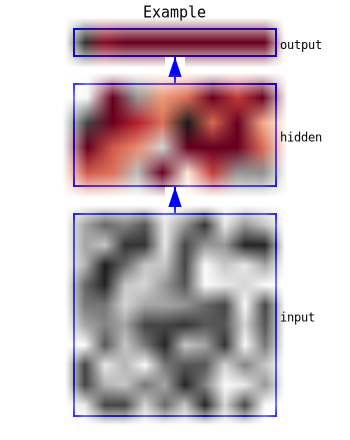

In [11]:
net

In [12]:
for index in range(50):
    net.propagate(net.dataset.inputs[index])